<a href="https://colab.research.google.com/github/DDGUZMANO/proyecto_mascotas/blob/Machine-Learning/1.2/limpieza_preparacion_datos_EDA_proyecto_mascotas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importacion de librerias, se pueden importar sin orden fijo, pero si es
# no es necesario pero es recomendable importar todas en esta primera celda

# Pandas es la libreria mas usada para manipulacion de datos, se suele
# decir que es la mano derecha de los que trabajan con datos
import pandas as pd

# matplotlib es la libreria mas basica para generar graficos de datos en python
# se importa el modulo pyplot porque es donde estan las funciones de graficos
import matplotlib.pyplot as plt

# seaborn nace de matplotlib, se puede decir que esta optimizada para generar
# algunos graficos de manera mas simple que con matplotlib puro
import seaborn as sns

# sklearn es una libreria especializada en algoritmos de machine learning
# standardScaler es usado para estandarizar los datos, se explica mas adelante
from sklearn.preprocessing import StandardScaler


El siguiente paso es cargar los datos. Ya previamente los teniamos generados del notebook anterior, que fue el que usamos para generar los datos ficticios. Es importante pegar estos datos en la carpeta de colab donde esta este notebook para poder trabajarlos aqui. La carpeta la podemos ver en la columna que esta aqui en este notebook del lado izquierdo <=== es el ultimo icono de arriba hacia abajo, abrimos eso, luego desde el ordenador copiamos y pegamos ahi en la carpeta. Querdaran debajo de la carpeta sample_data

In [2]:
df_mascotas = pd.read_json('mascotas_1500.json', orient='records')
df_cuidadores = pd.read_json('cuidadores_300.json', orient='records')

In [3]:
# se realiza una inspección inicial de los datos para familiarizarte con su
# estructura y posibles problemas.

print("Mascotas:")

print("Imprimimos las primeras filas de la tabla")
print(df_mascotas.head())

print("informacion del dataframe")
print(df_mascotas.info())

print("estadistica del dataframe")
print(df_mascotas.describe())

print("\nCuidadores:")
print("imprimimos los primeros registros de la tabla cuidadores")
print(df_cuidadores.head())
print("informacion del dataframe")

print(df_cuidadores.info())
print("estadistica del dataframe")
print(df_cuidadores.describe())

Mascotas:
Imprimimos las primeras filas de la tabla
      nombre tipo_animal     raza  tamanio temperamento  edad  \
0  Estefanía        Gato    Persa  Pequeño    Tranquilo  10.0   
1      Alejo       Perro  Bulldog   Grande     Sociable  16.0   
2  Prudencia         Ave   Pinzón  Pequeño    Tranquilo   7.0   
3  Fortunata        Gato  Ragdoll   Grande     Sociable   3.0   
4   Domitila         Ave  Canario   Grande    Tranquilo   4.0   

  tipo_alimentacion                          observaciones  \
0             Mixto         Atque voluptatum aliquam vero.   
1            Húmedo                    Et rerum similique.   
2            Húmedo              Repellendus eius ut quod.   
3             Mixto                Saepe ratione possimus.   
4              Seco  Consequuntur suscipit labore nostrum.   

                 ubicacion  necesidades_especiales nivel_actividad  \
0                    Amate                    True           Medio   
1               La Cartuja                  

Al observar las primeras filas de los registros, podemos identificar que la
columna tipos de mascotas aceptadas contiene *LISTAS* de tipos de mascotas. Esto
puede ser un problema a la hora de consultar si hay valores duplicados, lo veremos
mas adelante

El siguiente paso es verificar si en el dataset hay valores faltantes, sabemos
que el dataset fue generado por nosotros por lo que sabemos que no hay valores
faltantes.

In [4]:

print("\nValores faltantes en Mascotas:")
print(df_mascotas.isnull().sum())

print("\nValores faltantes en Cuidadores:")
print(df_cuidadores.isnull().sum())


Valores faltantes en Mascotas:
nombre                    0
tipo_animal               0
raza                      0
tamanio                   0
temperamento              0
edad                      0
tipo_alimentacion         0
observaciones             0
ubicacion                 0
necesidades_especiales    0
nivel_actividad           0
socializacion             0
historial_medico          0
fotos                     0
dtype: int64

Valores faltantes en Cuidadores:
nombre                      0
experiencia                 0
tipos_mascotas_aceptadas    0
tarifas                     0
ubicacion                   0
descripcion                 0
tamaño_mascota_aceptada     0
dtype: int64


Como dice mas arriba, al consultar si hay valores duplicados en el dataset, las columnas con datos en *LISTAS* pueden dar problemas, por lo que se tienen que
convertir en *TUPLAS*

In [5]:
# Convertir listas en tuplas en la columna tipos_mascotas_aceptadas
df_cuidadores['tipos_mascotas_aceptadas'] = df_cuidadores['tipos_mascotas_aceptadas'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

Verificamos que ya en la columna, las listas fueron convertidas a tuplas, visualmente las listas estan entre [ ] y las tuplas entre ( )

In [6]:
for col in df_cuidadores.columns:
    print(f"Columna: {col}")
    print(df_cuidadores[col].head())

Columna: nombre
0          Pastora Nebot Fabra
1                 Leonel Arias
2    Benito Che Llobet Cadenas
3          Yolanda Moles Gómez
4             Alejandra Casado
Name: nombre, dtype: object
Columna: experiencia
0    9
1    2
2    1
3    8
4    7
Name: experiencia, dtype: int64
Columna: tipos_mascotas_aceptadas
0                        (Ave,)
1    (Roedor, Ave, Perro, Gato)
2    (Roedor, Ave, Perro, Gato)
3    (Roedor, Gato, Ave, Perro)
4         (Perro, Gato, Roedor)
Name: tipos_mascotas_aceptadas, dtype: object
Columna: tarifas
0    22.06
1    26.39
2    18.52
3    25.00
4    24.07
Name: tarifas, dtype: float64
Columna: ubicacion
0        Padre Pío-Palmete
1           Huerta del Rey
2    Bellavista-La Palmera
3    San Pablo-Santa Justa
4                 Macarena
Name: ubicacion, dtype: object
Columna: descripcion
0    Occaecati porro incidunt dolore omnis. Volupta...
1    Voluptate aliquam minima debitis harum commodi...
2    Numquam ipsa facilis non. Modi ex sunt alias n...


Ahora verificamos si hay valores duplicados

In [7]:
print("\nDuplicados en Mascotas:", df_mascotas.duplicated().sum())
print("Duplicados en Cuidadores:", df_cuidadores.duplicated().sum())

df_mascotas = df_mascotas.drop_duplicates()
df_cuidadores = df_cuidadores.drop_duplicates()

print("\nDuplicados en Mascotas después de eliminar:", df_mascotas.duplicated().sum())
print("Duplicados en Cuidadores después de eliminar:", df_cuidadores.duplicated().sum())


Duplicados en Mascotas: 0
Duplicados en Cuidadores: 0

Duplicados en Mascotas después de eliminar: 0
Duplicados en Cuidadores después de eliminar: 0


A continuacion se suele verificar si hay errores ortograficos en las columnas que no sean numericas. Si por ejemplo tenemos fechas en una columna, se suele revisar que todos los registros tengan la fecha en el mismo formato. Tambien se revisa que los datos tengan el tipo de dato adecuado, por ejemplo si una columna numerica tiene como tipo de dato object, hay que convertirla a tipo de dato entero o flotante segun sea el caso. Nosotros sabemos que nuestro dataset no presenta estos inconvenientes porque los generamos ficticiamente


A continuación vamos a hacer el EDA (analisis exploratorio de datos). Esta es una practica muy recomendable y basicamente necesaria, para descubrir patrones, detectar valores atipicos o que se escapen de los valores normales, ver como es la distribucion de los datos y en general estudiar la calidad de los datos.

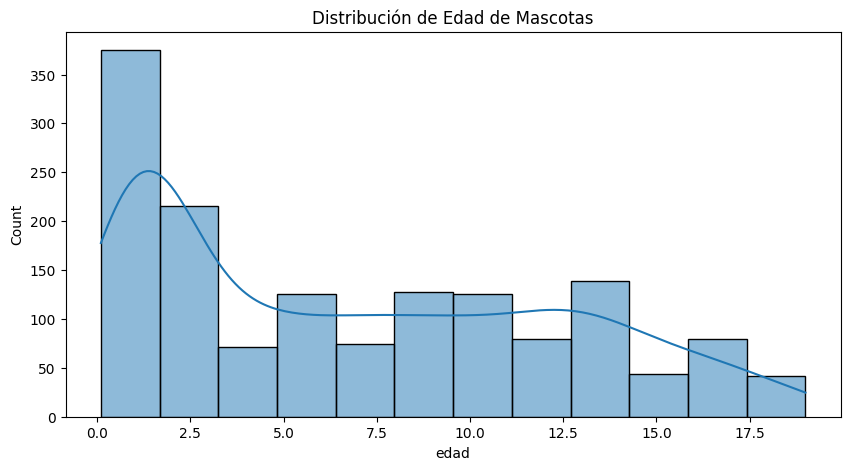

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_mascotas['edad'], kde=True)
plt.title('Distribución de Edad de Mascotas')
plt.show()

En este grafico podemos ver que existe un sesgo a la izquierda ocacionada por la desproporcion de uno de los grupos de edades con respecto al resto, esto puede ocacionar problemas a la hora de desarrollar el modelo de machine learning, existe tecnicas para mitigar los efectos del sesgo que mas adelante intentare aplicar


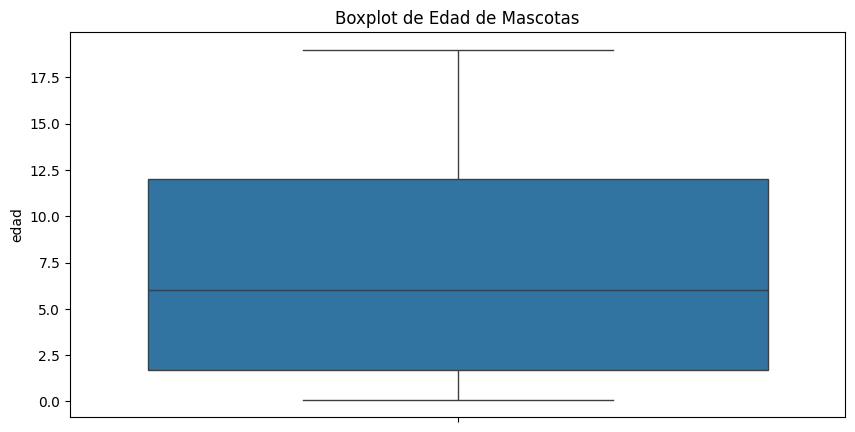

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_mascotas['edad'])
plt.title('Boxplot de Edad de Mascotas')
plt.show()

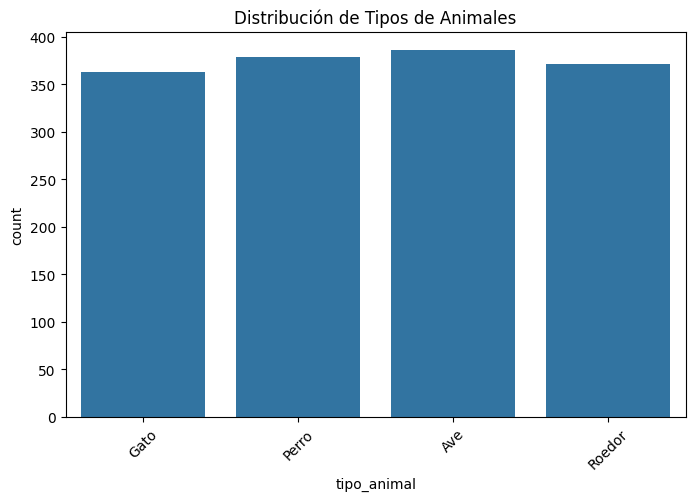

In [10]:
# Variables categóricas
plt.figure(figsize=(8, 5))
sns.countplot(x='tipo_animal', data=df_mascotas)
plt.title('Distribución de Tipos de Animales')
plt.xticks(rotation=45)
plt.show()

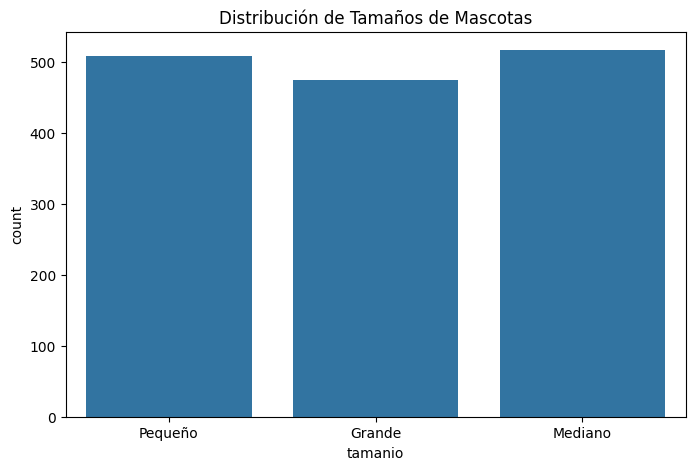

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='tamanio', data=df_mascotas)
plt.title('Distribución de Tamaños de Mascotas')
plt.show()

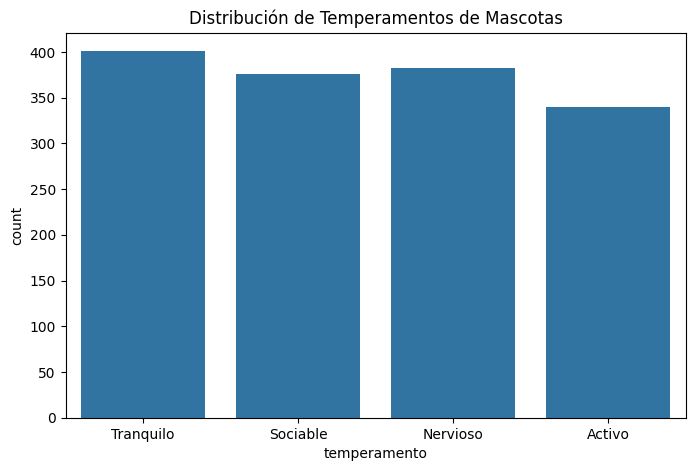

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='temperamento', data=df_mascotas)
plt.title('Distribución de Temperamentos de Mascotas')
plt.show()

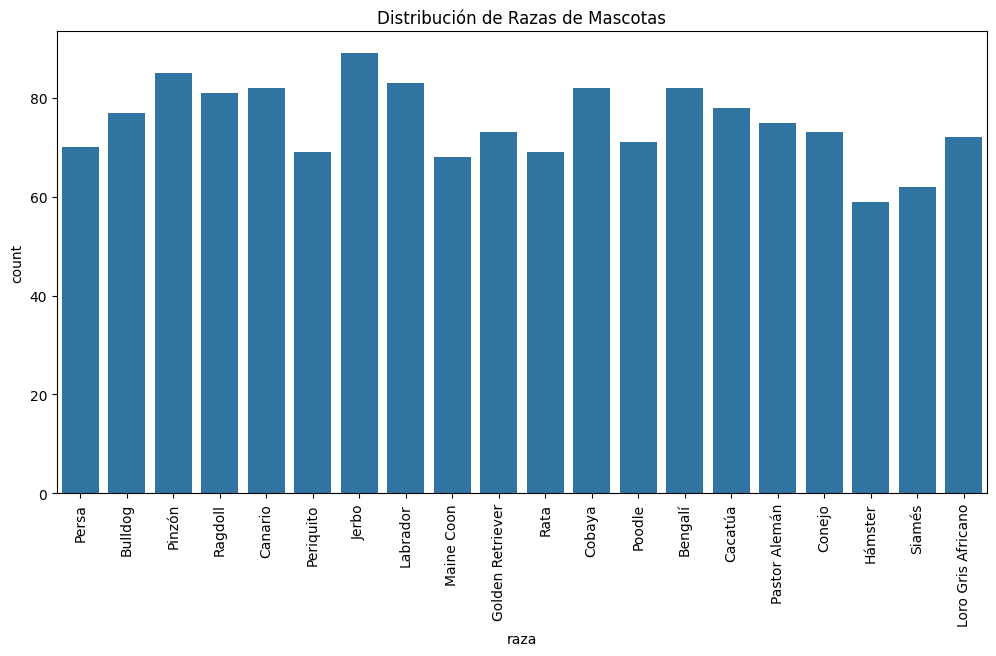

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='raza', data=df_mascotas)
plt.title('Distribución de Razas de Mascotas')
plt.xticks(rotation=90)
plt.show()

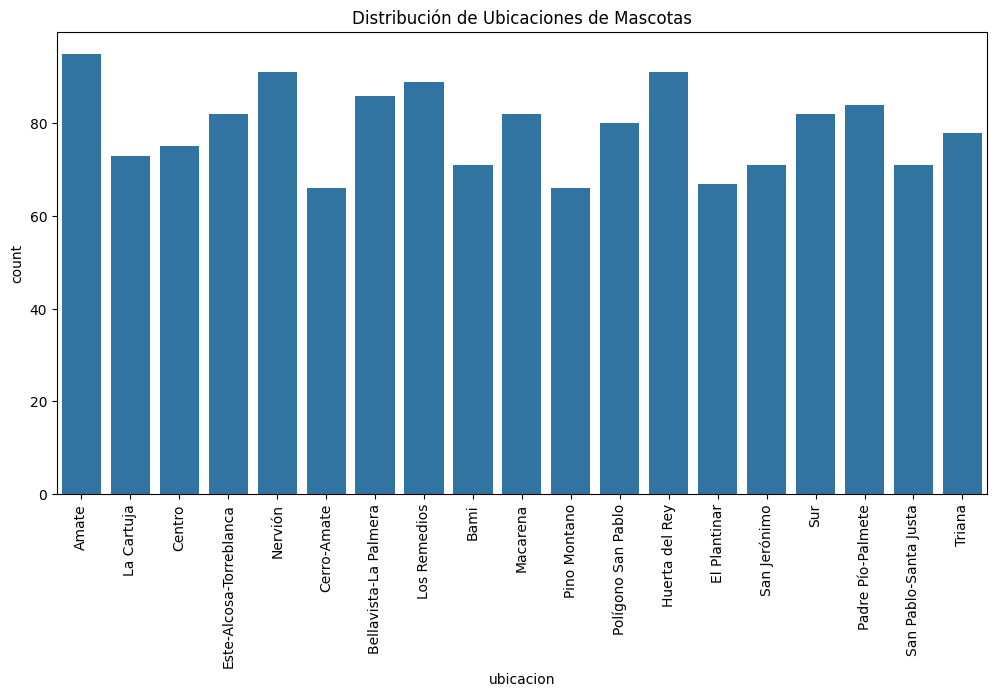

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ubicacion', data=df_mascotas)
plt.title('Distribución de Ubicaciones de Mascotas')
plt.xticks(rotation=90)
plt.show()


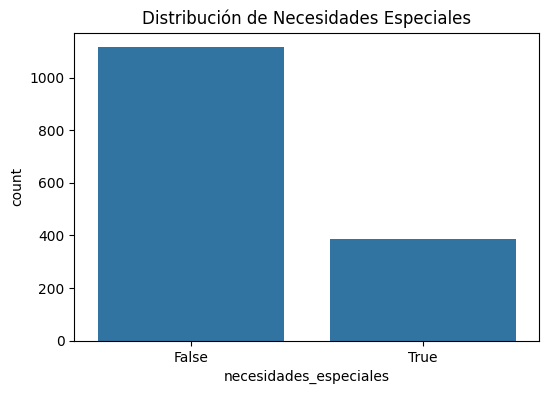

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='necesidades_especiales', data=df_mascotas)
plt.title('Distribución de Necesidades Especiales')
plt.show()

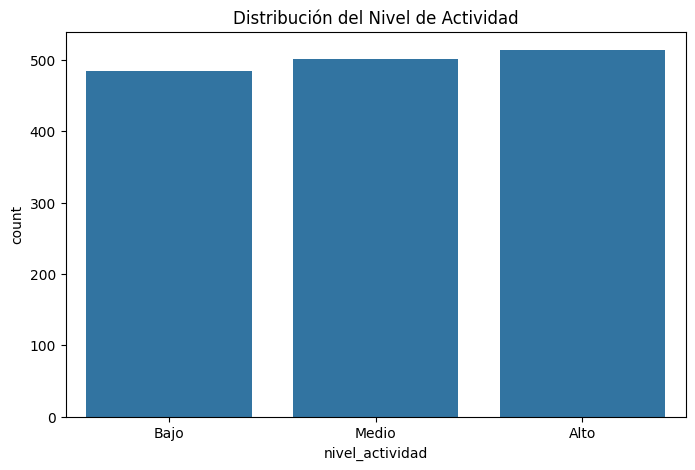

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='nivel_actividad', data=df_mascotas, order=['Bajo', 'Medio', 'Alto'])
plt.title('Distribución del Nivel de Actividad')
plt.show()

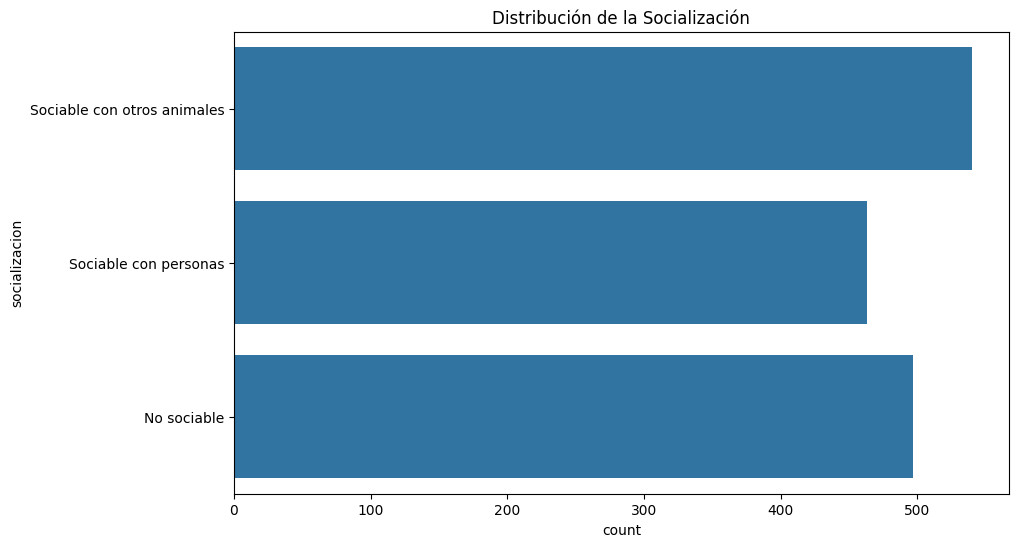

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y='socializacion', data=df_mascotas)
plt.title('Distribución de la Socialización')
plt.show()

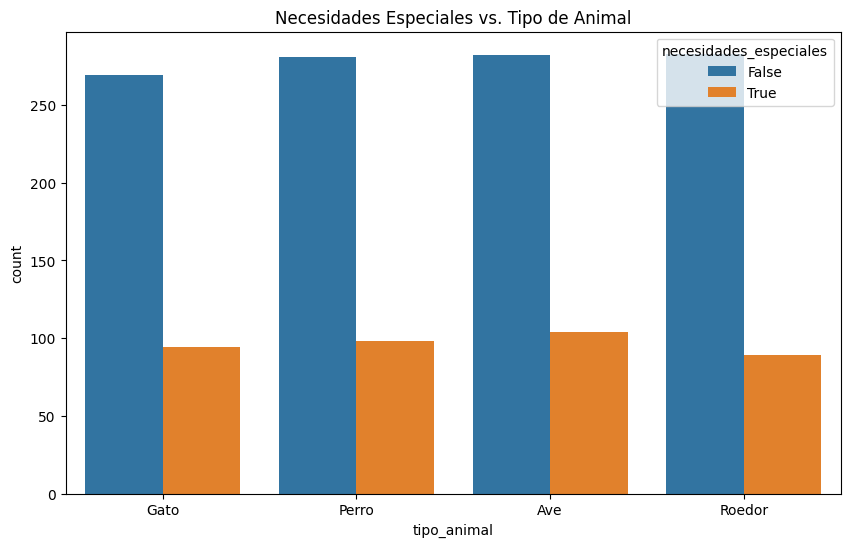

In [18]:

# Gráficos de relación corregidos
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_animal', hue='necesidades_especiales', data=df_mascotas)
plt.title('Necesidades Especiales vs. Tipo de Animal')
plt.show()

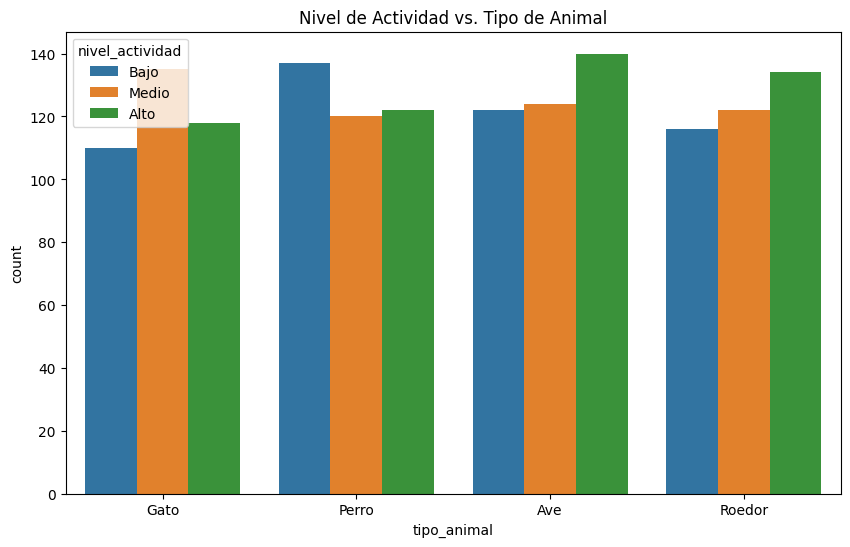

In [19]:
df_mascotas['nivel_actividad'] = pd.Categorical(df_mascotas['nivel_actividad'], categories=['Bajo', 'Medio', 'Alto'])

plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_animal', hue='nivel_actividad', data=df_mascotas)
plt.title('Nivel de Actividad vs. Tipo de Animal')
plt.show()

Ahora vamos con el dataset de Cuidadores

In [20]:
# imprimimos las columnas del dataset
df_cuidadores.columns

Index(['nombre', 'experiencia', 'tipos_mascotas_aceptadas', 'tarifas',
       'ubicacion', 'descripcion', 'tamaño_mascota_aceptada'],
      dtype='object')

Como vimos anteriormente, en la columna tipo_mascota_aceptada existen tuplas, donde se especifican que tipos de mascotas acepta cada cuidador, eso quiere decir que a diferencia de las otras columnas, que por cada registro o linea de la tabla, solo hay un valor, para la columna tipo_mascota_aceptada pueden existir varios valores, los valores que esten dentro de la tupla. Esto es un problema que lo podemos solucionar creando nuevas columnas con el nombre del animal, y si la persona del registro acepta este animal, entonces a dicha columna le asignamos el valor uno, caso contrario le asignamos cero, es decir, creamos columnas binarias.

In [21]:
df_cuidadores.tipos_mascotas_aceptadas.unique()

array([('Ave',), ('Roedor', 'Ave', 'Perro', 'Gato'),
       ('Roedor', 'Gato', 'Ave', 'Perro'), ('Perro', 'Gato', 'Roedor'),
       ('Perro', 'Ave', 'Gato', 'Roedor'), ('Roedor',), ('Gato',),
       ('Ave', 'Gato', 'Roedor'), ('Roedor', 'Perro', 'Gato'),
       ('Gato', 'Roedor', 'Ave', 'Perro'),
       ('Ave', 'Gato', 'Perro', 'Roedor'), ('Perro', 'Ave', 'Roedor'),
       ('Perro', 'Gato', 'Ave'), ('Gato', 'Perro', 'Ave', 'Roedor'),
       ('Perro',), ('Roedor', 'Ave', 'Gato', 'Perro'), ('Perro', 'Gato'),
       ('Ave', 'Roedor'), ('Ave', 'Perro', 'Gato'),
       ('Gato', 'Roedor', 'Ave'), ('Ave', 'Perro', 'Roedor', 'Gato'),
       ('Ave', 'Roedor', 'Perro'), ('Perro', 'Roedor'),
       ('Gato', 'Perro', 'Roedor', 'Ave'), ('Roedor', 'Ave', 'Gato'),
       ('Roedor', 'Gato', 'Perro'), ('Perro', 'Roedor', 'Gato'),
       ('Gato', 'Ave', 'Perro'), ('Roedor', 'Ave'),
       ('Gato', 'Ave', 'Roedor'), ('Perro', 'Ave', 'Roedor', 'Gato'),
       ('Roedor', 'Gato'), ('Perro', 'Ave', 'Gato'),


Creamos una funcion simple que cree las nuevas columnas

In [22]:
# Función para crear columnas binarias de tipos de mascotas aceptadas
def crear_columnas_tipos_aceptados(df):
    tipos_mascotas = ['Ave', 'Gato', 'Perro', 'Roedor']
    for tipo in tipos_mascotas:
        df[f'acepta_{tipo}'] = df['tipos_mascotas_aceptadas'].apply(lambda x: 1 if tipo in x else 0)
    return df

# Aplicamos la funcion al dataset
df_cuidadores = crear_columnas_tipos_aceptados(df_cuidadores)

Verificamos si las columnas fueron creadas

In [23]:
df_cuidadores.columns

Index(['nombre', 'experiencia', 'tipos_mascotas_aceptadas', 'tarifas',
       'ubicacion', 'descripcion', 'tamaño_mascota_aceptada', 'acepta_Ave',
       'acepta_Gato', 'acepta_Perro', 'acepta_Roedor'],
      dtype='object')

Verifiquemos como se ven los valores con las primeras 5 registros del dataset

In [24]:
df_cuidadores.head()

,nombre,experiencia,tipos_mascotas_aceptadas,tarifas,ubicacion,descripcion,tamaño_mascota_aceptada,acepta_Ave,acepta_Gato,acepta_Perro,acepta_Roedor
0,Pastora Nebot Fabra,9,"(Ave,)",22.06,Padre Pío-Palmete,Occaecati porro incidunt dolore omnis. Volupta...,Cualquiera,1,0,0,0
1,Leonel Arias,2,"(Roedor, Ave, Perro, Gato)",26.39,Huerta del Rey,Voluptate aliquam minima debitis harum commodi...,Cualquiera,1,1,1,1
2,Benito Che Llobet Cadenas,1,"(Roedor, Ave, Perro, Gato)",18.52,Bellavista-La Palmera,Numquam ipsa facilis non. Modi ex sunt alias n...,Grande,1,1,1,1
3,Yolanda Moles Gómez,8,"(Roedor, Gato, Ave, Perro)",25.00,San Pablo-Santa Justa,Accusamus deserunt deserunt error. Velit modi ...,Grande,1,1,1,1
4,Alejandra Casado,7,"(Perro, Gato, Roedor)",24.07,Macarena,Voluptas ex laudantium iste voluptatem accusam...,Pequeño,0,1,1,1


Ahora la columna tipos_mascota_aceptada no es necesaria por lo que la eliminamos del dataset

In [25]:

df_cuidadores = df_cuidadores.drop('tipos_mascotas_aceptadas', axis=1)

In [26]:
df_cuidadores.head()

,nombre,experiencia,tarifas,ubicacion,descripcion,tamaño_mascota_aceptada,acepta_Ave,acepta_Gato,acepta_Perro,acepta_Roedor
0,Pastora Nebot Fabra,9,22.06,Padre Pío-Palmete,Occaecati porro incidunt dolore omnis. Volupta...,Cualquiera,1,0,0,0
1,Leonel Arias,2,26.39,Huerta del Rey,Voluptate aliquam minima debitis harum commodi...,Cualquiera,1,1,1,1
2,Benito Che Llobet Cadenas,1,18.52,Bellavista-La Palmera,Numquam ipsa facilis non. Modi ex sunt alias n...,Grande,1,1,1,1
3,Yolanda Moles Gómez,8,25.00,San Pablo-Santa Justa,Accusamus deserunt deserunt error. Velit modi ...,Grande,1,1,1,1
4,Alejandra Casado,7,24.07,Macarena,Voluptas ex laudantium iste voluptatem accusam...,Pequeño,0,1,1,1


Ahora empezamos con el EDA del dataset cuidadores

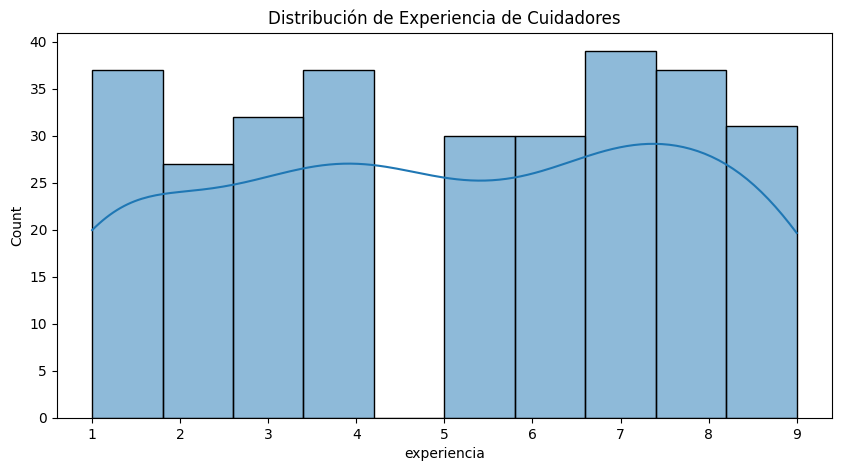

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cuidadores['experiencia'], kde=True)
plt.title('Distribución de Experiencia de Cuidadores')
plt.show()

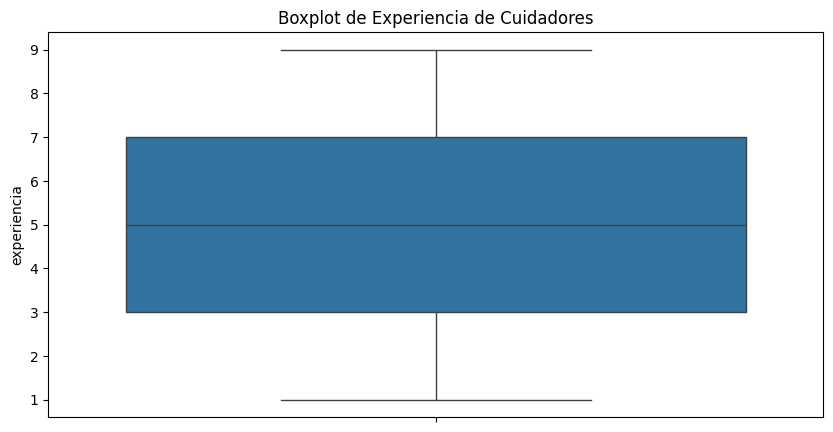

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_cuidadores['experiencia'])
plt.title('Boxplot de Experiencia de Cuidadores')
plt.show()

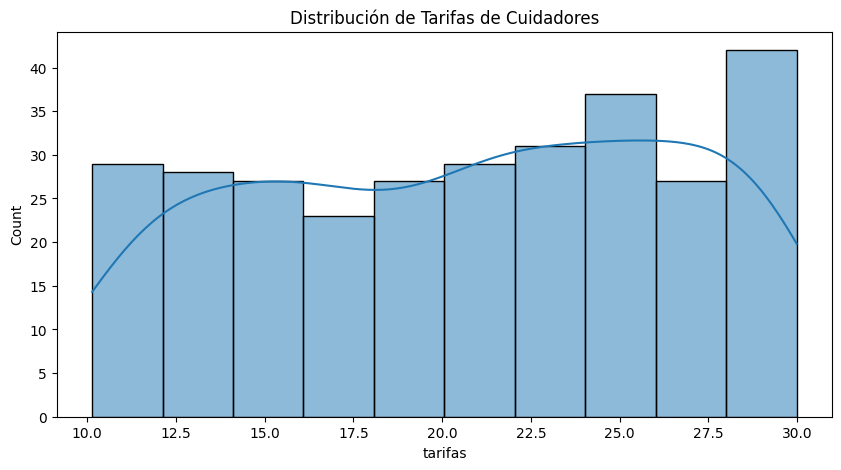

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cuidadores['tarifas'], kde=True)
plt.title('Distribución de Tarifas de Cuidadores')
plt.show()

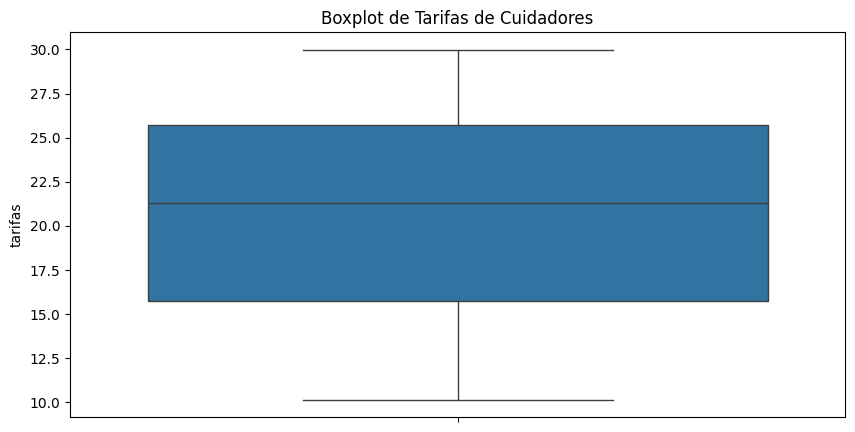

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_cuidadores['tarifas'])
plt.title('Boxplot de Tarifas de Cuidadores')
plt.show()

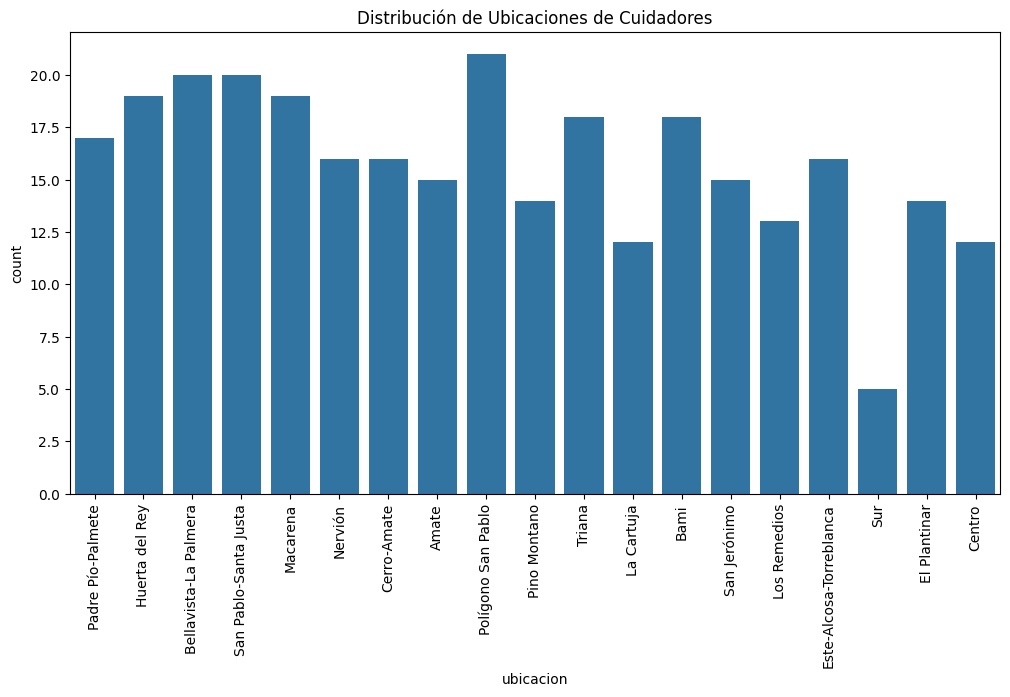

In [32]:
# Variables categóricas
plt.figure(figsize=(12, 6))
sns.countplot(x='ubicacion', data=df_cuidadores)
plt.title('Distribución de Ubicaciones de Cuidadores')
plt.xticks(rotation=90)
plt.show()


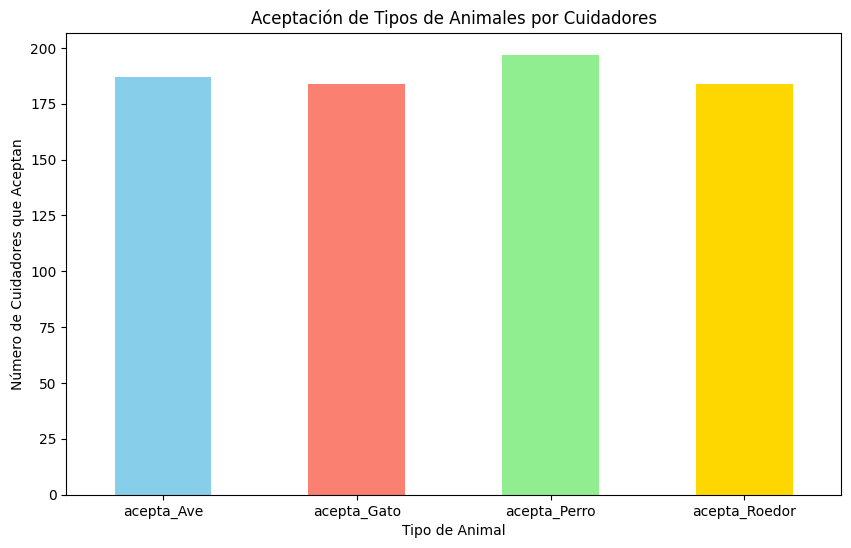

In [33]:
# Contar la aceptación de cada tipo de animal
aceptacion_animales = df_cuidadores[['acepta_Ave', 'acepta_Gato', 'acepta_Perro', 'acepta_Roedor']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
aceptacion_animales.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Aceptación de Tipos de Animales por Cuidadores')
plt.xlabel('Tipo de Animal')
plt.ylabel('Número de Cuidadores que Aceptan')
plt.xticks(rotation=0)
plt.show()

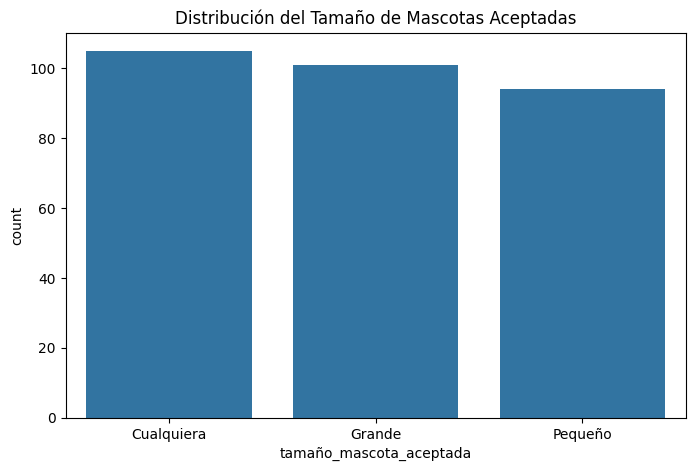

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='tamaño_mascota_aceptada', data=df_cuidadores)
plt.title('Distribución del Tamaño de Mascotas Aceptadas')
plt.show()

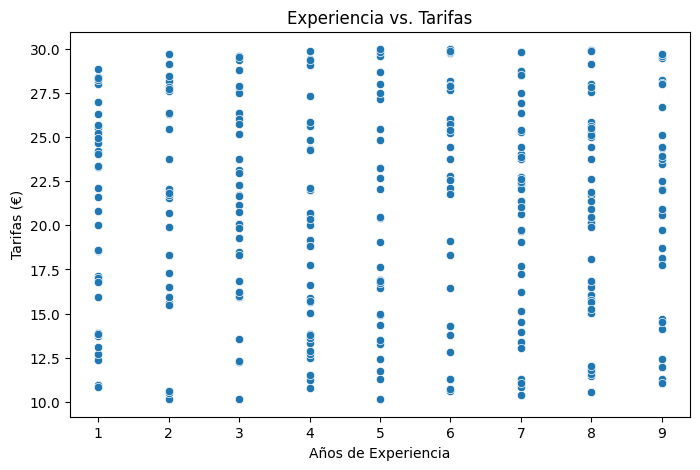

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='experiencia', y='tarifas', data=df_cuidadores)
plt.title('Experiencia vs. Tarifas')
plt.xlabel('Años de Experiencia')
plt.ylabel('Tarifas (€)')
plt.show()

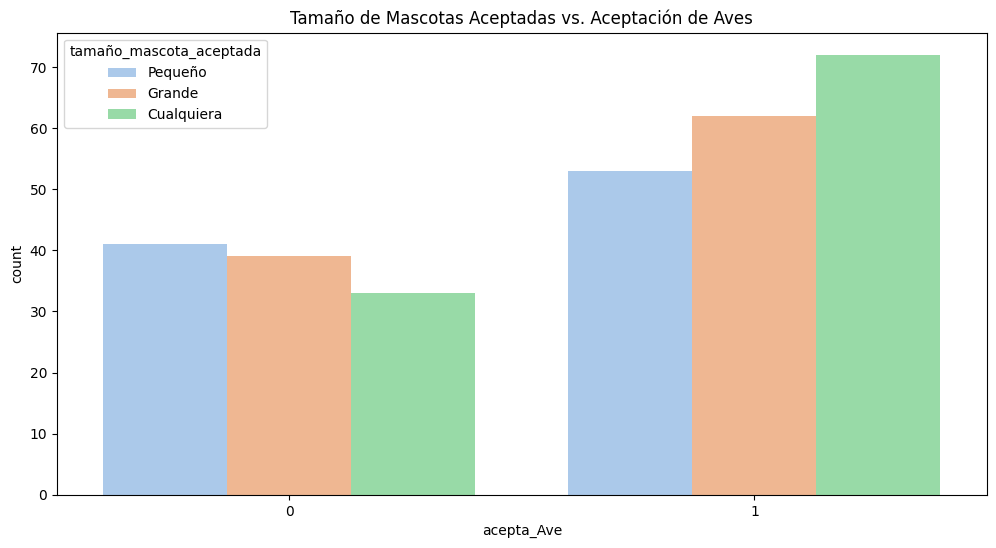

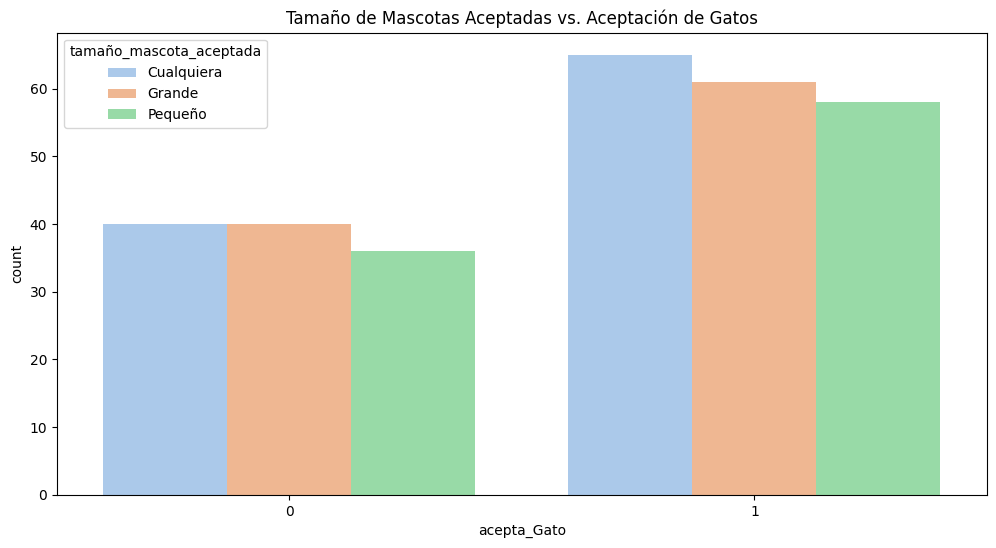

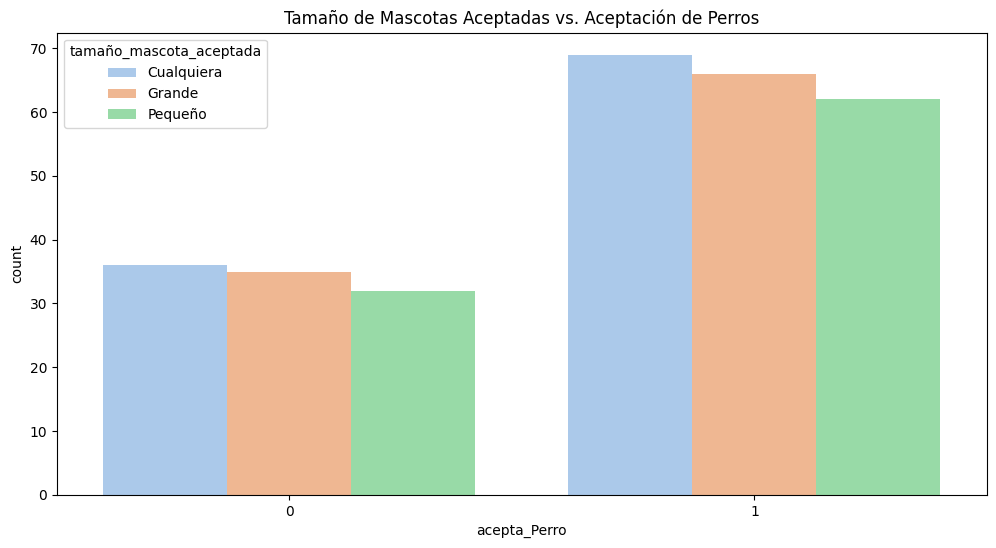

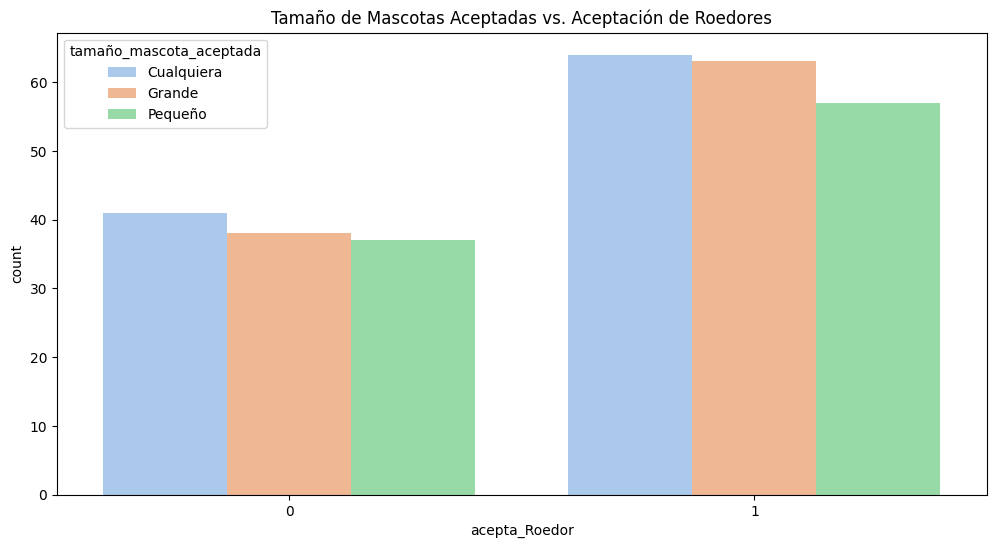

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='acepta_Ave', hue='tamaño_mascota_aceptada', data=df_cuidadores, palette='pastel')
plt.title('Tamaño de Mascotas Aceptadas vs. Aceptación de Aves')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='acepta_Gato', hue='tamaño_mascota_aceptada', data=df_cuidadores, palette='pastel')
plt.title('Tamaño de Mascotas Aceptadas vs. Aceptación de Gatos')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='acepta_Perro', hue='tamaño_mascota_aceptada', data=df_cuidadores, palette='pastel')
plt.title('Tamaño de Mascotas Aceptadas vs. Aceptación de Perros')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='acepta_Roedor', hue='tamaño_mascota_aceptada', data=df_cuidadores, palette='pastel')
plt.title('Tamaño de Mascotas Aceptadas vs. Aceptación de Roedores')
plt.show()

Las graficas nos muestran distribuciones mas o menos uniforme, lo que nos dice que podriamos intentar usarlos

A continuacion se tiene que convertir las columnas categoricas (no numericas) a columnas numericas, existen varios metodos de pandas, pero yo suelo usar uno que se llama get dummies, esto lo que hace es crear nuevas columnas, donde cada opcion de nuestras columnas categoricas se convierte en una de estas nuevas columnas, luego para cada fila, donde el dato corresponda a una de estas columnas, ahi se pone True y en el resto Falso, es decir, toma valores booleanos, es dificil de entender asi, lo se...

In [37]:
# Aplicar get_dummies con dtype=int
columnas_a_transformar = ['tipo_animal', 'raza', 'tamanio', 'temperamento', 'tipo_alimentacion', 'ubicacion', 'necesidades_especiales', 'nivel_actividad', 'socializacion']
df_mascotas = pd.get_dummies(df_mascotas, columns=columnas_a_transformar, dtype=int)


In [38]:
# Hacemos lo mismo con cuidadores
columnas_a_transformar = ['ubicacion', 'tamaño_mascota_aceptada']
df_cuidadores = pd.get_dummies(df_cuidadores, columns=columnas_a_transformar, dtype=int)



Para que veas mas o menos como queda el dataset despues de esto, lo imprimo

In [39]:
df_cuidadores.head()

,nombre,experiencia,tarifas,descripcion,acepta_Ave,acepta_Gato,acepta_Perro,acepta_Roedor,ubicacion_Amate,ubicacion_Bami,...,ubicacion_Padre Pío-Palmete,ubicacion_Pino Montano,ubicacion_Polígono San Pablo,ubicacion_San Jerónimo,ubicacion_San Pablo-Santa Justa,ubicacion_Sur,ubicacion_Triana,tamaño_mascota_aceptada_Cualquiera,tamaño_mascota_aceptada_Grande,tamaño_mascota_aceptada_Pequeño
0,Pastora Nebot Fabra,9,22.06,Occaecati porro incidunt dolore omnis. Volupta...,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Leonel Arias,2,26.39,Voluptate aliquam minima debitis harum commodi...,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Benito Che Llobet Cadenas,1,18.52,Numquam ipsa facilis non. Modi ex sunt alias n...,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Yolanda Moles Gómez,8,25.00,Accusamus deserunt deserunt error. Velit modi ...,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Alejandra Casado,7,24.07,Voluptas ex laudantium iste voluptatem accusam...,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


y estas son las columnas que quedaron

In [40]:
df_cuidadores.columns

Index(['nombre', 'experiencia', 'tarifas', 'descripcion', 'acepta_Ave',
       'acepta_Gato', 'acepta_Perro', 'acepta_Roedor', 'ubicacion_Amate',
       'ubicacion_Bami', 'ubicacion_Bellavista-La Palmera', 'ubicacion_Centro',
       'ubicacion_Cerro-Amate', 'ubicacion_El Plantinar',
       'ubicacion_Este-Alcosa-Torreblanca', 'ubicacion_Huerta del Rey',
       'ubicacion_La Cartuja', 'ubicacion_Los Remedios', 'ubicacion_Macarena',
       'ubicacion_Nervión', 'ubicacion_Padre Pío-Palmete',
       'ubicacion_Pino Montano', 'ubicacion_Polígono San Pablo',
       'ubicacion_San Jerónimo', 'ubicacion_San Pablo-Santa Justa',
       'ubicacion_Sur', 'ubicacion_Triana',
       'tamaño_mascota_aceptada_Cualquiera', 'tamaño_mascota_aceptada_Grande',
       'tamaño_mascota_aceptada_Pequeño'],
      dtype='object')

luego se tiene que estandarizar los datos, esto se hace para que todos los datos tengan una media de 0 y una desviacion estandar de 1, al todos los datos estar en la misma escala, en los modelos de machine learning no se genera mas peso en una columna que en otra, sino que todas tienen el mismo valor, en resumen, se estandariza para que el modelo de machine learning funcione mejor.

para estandarizar se usa StandarScaler de la liberia sklearn, una de las librerias mas comunes para modelos de machine learning

In [41]:

columnas_numericas_mascotas = df_mascotas.select_dtypes(include=['number']).columns

# Inicializar el StandardScaler
scaler_mascotas = StandardScaler()

# Estandarizar las columnas numéricas
df_mascotas[columnas_numericas_mascotas] = scaler_mascotas.fit_transform(df_mascotas[columnas_numericas_mascotas])

# Guardar el DataFrame estandarizado en un archivo CSV
df_mascotas.to_csv('mascotas_preparadas.csv', index=False)

print("Dataset de mascotas estandarizado y guardado en mascotas_1500_estandarizado.csv")

# Dataset de Cuidadores

# Seleccionar las columnas numéricas para estandarizar
columnas_numericas_cuidadores = df_cuidadores.select_dtypes(include=['number']).columns

# Inicializar el StandardScaler
scaler_cuidadores = StandardScaler()

# Estandarizar las columnas numéricas
df_cuidadores[columnas_numericas_cuidadores] = scaler_cuidadores.fit_transform(df_cuidadores[columnas_numericas_cuidadores])

# Guardar el DataFrame estandarizado en un archivo CSV
df_cuidadores.to_csv('cuidadores_preparados.csv', index=False)

print("Dataset de cuidadores estandarizado y guardado en cuidadores_300_estandarizado.csv")

Dataset de mascotas estandarizado y guardado en mascotas_1500_estandarizado.csv
Dataset de cuidadores estandarizado y guardado en cuidadores_300_estandarizado.csv


Ya por ultimo descargamos los archivos

In [42]:
from google.colab import files

files.download('mascotas_preparadas.csv')
files.download('cuidadores_preparados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>